In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import random

N   = 100
aux = frange(-1,1,0.001)
x   = np.random.choice(aux, N, replace = True)
y   = np.random.choice(aux, N, replace = True)
z   = np.random.choice(aux, N, replace = True)

# vx  = np.random.choice(aux, N, replace = True)
# vy  = np.random.choice(aux, N, replace = True)
# vz  = np.random.choice(aux, N, replace = True)

x = x*100
y = y*100
z = z*100

r = np.sqrt(x**2 + y**2 + z**2)

mask, = np.where(r<100)

x = x[mask]
y = y[mask]
z = z[mask]

# vx = vx*400 + 100
# vy = vy*400 + 100
# vz = vz*400 + 100

vx = np.zeros(N)
vy = np.zeros(N)
vz = np.zeros(N)

vx = vx[mask]
vy = vy[mask]
vz = vz[mask]

In [3]:
#W = np.ndarray([len(x),6])
#W[:,0]=x
#W[:,1]=y
#W[:,2]=z
#W[:,3]=vx
#W[:,4]=vy
#W[:,5]=vz
# print W

(-150, 150)

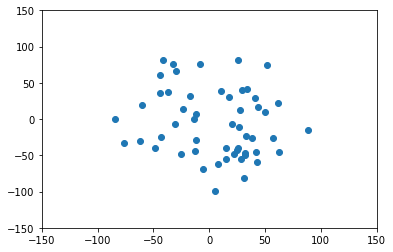

In [4]:
plt.plot(x,y,'o')
plt.xlim(-150,150)
plt.ylim(-150,150)

In [5]:
m = np.ones(len(x))*5e11
m = m/len(m)
print len(m)
# m[0] = 1e20

53


In [6]:
#calculamos la aceleracion

from aceleracion import *

ax, ay, az = aceleracion.a_str(m,x,y,z,len(m))

# d = np.ndarray([np.size(a),3])
# d[:,0] = u_str
# d[:,1] = u_gas
# d[:,2] = u_drk
# np.savetxt('energia_potencial0.dat', d, '%12.6f', '\t')

In [7]:
print ax, ay, az

[ -34.34576797  237.095047    141.01522827  258.66235352  -22.04409599
  -83.70331573  133.93418884   74.7447052    35.67286301  -33.84197617
  137.12205505 -165.05685425 -178.99911499  119.76512146  -61.78480148
   26.60515022  -41.1323967   122.83590698  -54.31345367   90.00025177
  -47.59265518   44.19372177  102.94678497   71.66241455  253.9336853
   18.85421753  -63.01724243 -201.36593628 -141.45846558   84.27967834
  -75.0220108  -256.32388306   44.29599762  -28.96872902  -30.83482742
  128.44863892 -152.33323669 -119.95442963 -101.90435028  418.89920044
  117.0446167  -195.62330627 -180.78588867   66.74571991  148.38635254
 -147.36468506   39.27372742 -184.16539001   81.80653381  -19.91913223
   68.21164703 -562.39831543  117.81855011] [ -34.5681076   333.09317017   52.09818268  143.4540863   -60.13884354
  155.02156067  -88.06771088   35.36284637  -48.64612961  -44.73830795
   79.53305817  -10.93507481  -39.07141876    4.72861576 -146.37390137
 -128.81730652  -52.44295883  -33.

In [8]:
#R = np.ndarray([len(m),6])
#R[:,0]=vx
#R[:,1]=vy
#R[:,2]=vz
#R[:,3]=ax
#R[:,4]=ay
#R[:,5]=az
# print R

In [9]:
#h = 0.1

#for k in range(0,10):
#    for i in range(0,len(m)):
#        W[i,:] = W[i,:] + h * R[i,:]
#        R[:,0] = W[:,3]
#        R[:,1] = W[:,4]
#        R[:,2] = W[:,5]
        
#        R[:,3], R[:,4], R[:,5] = aceleracion.a_str(m,W[:,0],W[:,1],W[:,2],len(m))
        
        #print W[i,:]
        

In [10]:
h = 0.001

xx=x
yy=y
zz=z

vxx=vx
vyy=vy
vzz=vz

axx=ax
ayy=ay
azz=az

nit=100
for k in range(0,nit):
    xx = xx + h * vxx
    yy = yy + h * vyy
    zz = zz + h * vzz

    vxx = vxx + h * axx
    vyy = vyy + h * ayy
    vzz = vzz + h * azz
    
    axx,ayy,azz = aceleracion.a_str(m,xx,yy,zz,len(m))
        
        #print W[i,:]

### print W

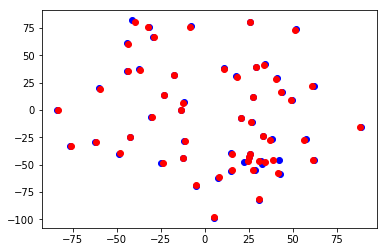

In [11]:
plt.plot(x,y,'o', color='b')
plt.plot(xx,yy,'o', color='r')

In [12]:
from integradores import *
ax,ay,az=integradores.a_str(0.5,m,x,y,z,len(m))

In [13]:
from integradores import *
eps=0.5
#h = 0.0001
#nit = 100000
x0,y0,z0,vx0,vy0,vz0,ax0,ay0,az0 =integradores.euler(eps,h,nit,m,x,y,z,vx,vy,vz,ax,ay,az,len(m))

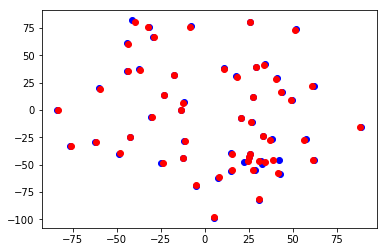

In [14]:
plot(x,y,'o', color='b')
plot(x0,y0,'o', color='r')

In [15]:
print integradores.__doc__

ax,ay,az = a_str(eps,m,x,y,z,[n])

Wrapper for ``a_str``.

Parameters
----------
eps : input float
m : input rank-1 array('f') with bounds (n)
x : input rank-1 array('f') with bounds (n)
y : input rank-1 array('f') with bounds (n)
z : input rank-1 array('f') with bounds (n)

Other Parameters
----------------
n : input int, optional
    Default: len(m)

Returns
-------
ax : rank-1 array('f') with bounds (n)
ay : rank-1 array('f') with bounds (n)
az : rank-1 array('f') with bounds (n)
x,y,z,vx,vy,vz,ax,ay,az = euler(eps,dt,nit,m,x,y,z,vx,vy,vz,ax,ay,az,[n])

Wrapper for ``euler``.

Parameters
----------
eps : input float
dt : input float
nit : input int
m : input rank-1 array('f') with bounds (n)
x : input rank-1 array('f') with bounds (n)
y : input rank-1 array('f') with bounds (n)
z : input rank-1 array('f') with bounds (n)
vx : input rank-1 array('f') with bounds (n)
vy : input rank-1 array('f') with bounds (n)
vz : input rank-1 array('f') with bounds (n)
ax : input rank-1 array('f') 